# Results

In [1]:
%reset -f

import ROOT, json
ROOT.gErrorIgnoreLevel = ROOT.kWarning

ROOT.ROOT.EnableImplicitMT(6)

ROOT.gStyle.SetOptFit(1)
ROOT.gStyle.SetOptStat(0)

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

ROOT.gStyle.SetPadRightMargin(0.01)
ROOT.gStyle.SetPadLeftMargin(0.075)
ROOT.gStyle.SetPadBottomMargin(0.12)

ROOT.gStyle.SetTitleFont(42,'xy')
ROOT.gStyle.SetTitleFont(42,'T')
ROOT.gStyle.SetTitleSize(0.075, 'XY')
ROOT.gStyle.SetTitleSize(0.1, 'T')
ROOT.gStyle.SetTitleOffset(0.8, 'X')
ROOT.gStyle.SetTitleOffset(0.45, 'Y')
#ROOT.gStyle.SetLabelFont(42,'xy')
#ROOT.gStyle.SetLabelSize(0.07, 'XY')

ROOT.gStyle.SetMarkerSize(3)
ROOT.TH1.AddDirectory(0)


%run -i eppi0_columns.py
%run -i eppi0_binning_scheme_v3.py
%run -i eppi0_bsa.py


rdfs = []
for fname in ["data/lvl2_eppi0.inb.qa.ecorr.pcorr.root", "data/lvl2_eppi0.outb.qa.ecorr.pcorr.root"]:
    df = ROOT.RDataFrame("h22", fname)
    df = define_eppi0_columns_using_proton(df)

    cut = "&&".join(f"(((int)status)&(1<<{i}))" for i in [ecloose,prodc,gloosest])
    cut += "&& abs(dphi)<4 && dpz>-0.5 && dpz<0.9 && mm2>-0.3 && mm2<0.4"
    cut += "&& abs(dpt)<0.3"
    cut += "&& thp<44.106+-6.625*pp+1.438*pp*pp"

    df = df.Filter(cut)
    
    rdf = define_eppi0_bins(df, fname)
    rdf = process_eppi0_bins(rdf, fname)
    
    make_allbsas(rdf)
    
    rdfs.append(rdf)

Welcome to JupyROOT 6.26/00


In [2]:
def xshift(gr0, dx=0):
    for i in range(gr0.GetN()):
        gr0.SetPointX(i, gr0.GetPointX(i)+dx)
    return gr0

____________________________

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


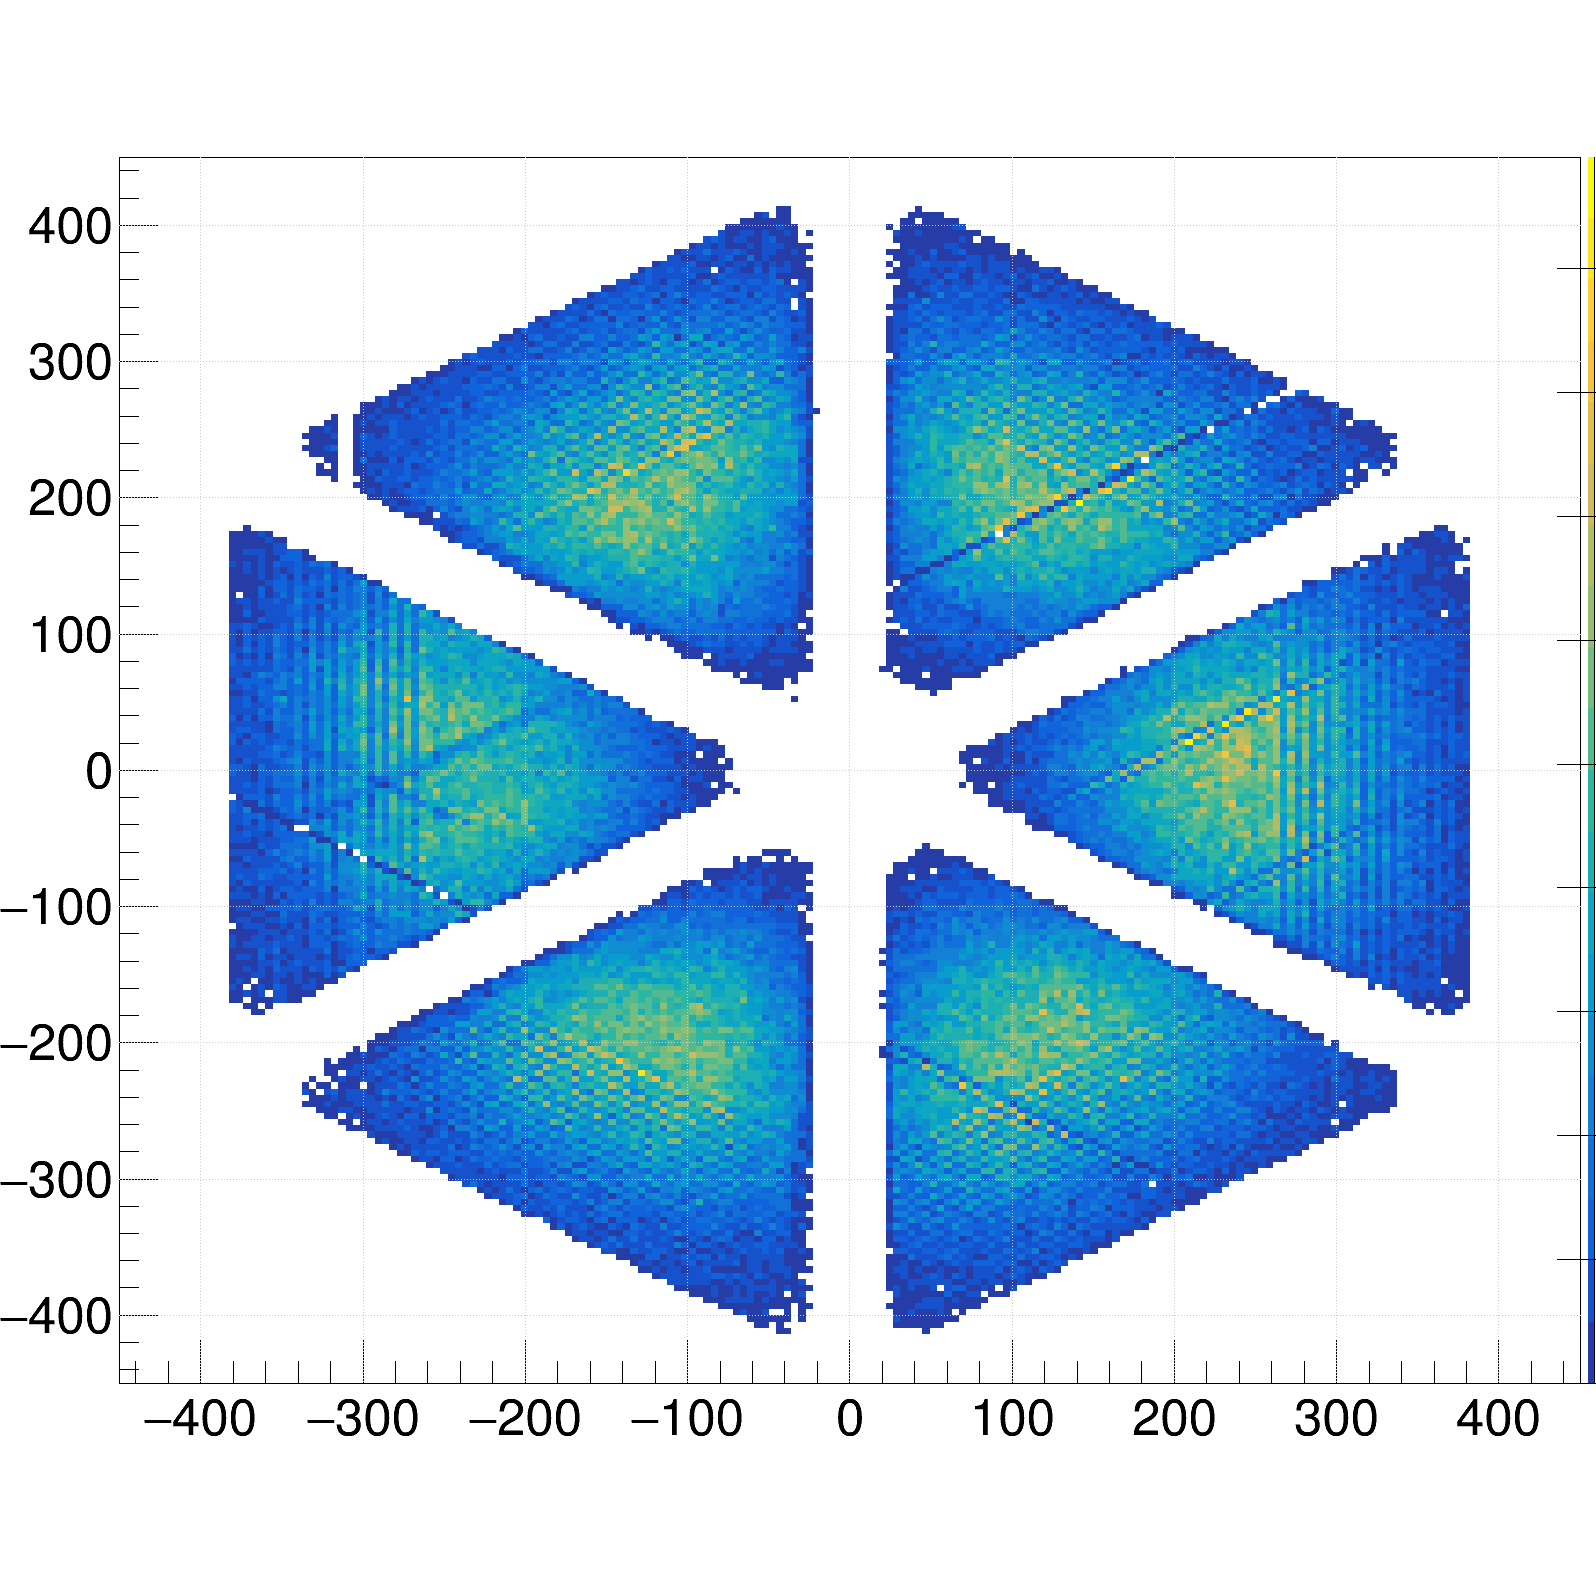

In [3]:
idf,odf = rdfs
hmgg = idf.Histo1D(("mgg", "", 300,0.065,0.205),"mgg")

hxy = idf.Histo2D(("hpcalxy", "", 200,-450,450,200,-450,450), "g1ecx", "g1ecy")
hxyi2 = idf.Histo2D(("hpcalxyi2", "", 200,-450,450,200,-450,450), "g2ecx", "g2ecy")
hxyo1 = odf.Histo2D(("hpcalxyo1", "", 200,-450,450,200,-450,450), "g1ecx", "g1ecy")
hxyo2 = odf.Histo2D(("hpcalxyo2", "", 200,-450,450,200,-450,450), "g2ecx", "g2ecy")

hxy.GetValue().Add(hxyi2.GetValue())
hxy.GetValue().Add(hxyo1.GetValue())
hxy.GetValue().Add(hxyo2.GetValue())

c1 = ROOT.TCanvas("c1","c1",1600,1600)
c1.Draw()

hxy.Draw("colz")
